In [10]:
# we will use the pandas module because it allows us to work with R-like dataframes
import pandas as pd

# often we need some functions from numpy as well
import numpy as np

# the next two lines will force jypyter to output all results from a cell (by default only the last one is shown)
# using semicolon (;) in the end of a line will force that line not to output the result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Inspecting our data:

## Read csv file:

In [12]:
# we can read directly from an URL as well
irisdf = pd.read_csv("https://raw.githubusercontent.com/deister/AI/master/resources/iris.csv", header = None)

# we can assign (new) column names
irisdf.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# See the data
irisdf.head()

# Data size
irisdf.shape

# Ask for specific statistic of a column
irisdf.sepal_length.mean()

# Or of all columns
irisdf.mean()

,sepal_length,sepal_width,petal_length,petal_width,species
0,sepal length,sepal width,petal length,petal width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


(151, 5)

TypeError: Could not convert sepal length5.14.94.74.65.05.44.65.04.44.95.44.84.84.35.85.75.45.15.75.15.45.14.65.14.85.05.05.25.24.74.85.45.25.54.95.05.54.94.45.15.04.54.45.05.14.85.14.65.35.07.06.46.95.56.55.76.34.96.65.25.05.96.06.15.66.75.65.86.25.65.96.16.36.16.46.66.86.76.05.75.55.55.86.05.46.06.76.35.65.55.56.15.85.05.65.75.76.25.15.76.35.87.16.36.57.64.97.36.77.26.56.46.85.75.86.46.57.77.76.06.95.67.76.36.77.26.26.16.47.27.47.96.46.36.17.76.36.46.06.96.76.95.86.86.76.76.36.56.25.9 to numeric

## Working with NA's

In [6]:
# Count how many NA elements in every column
irisdf.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    1
petal_width     2
species         0
dtype: int64

In [8]:
# Remove rows that have NA's
irisdf = irisdf.dropna()

# now the shape is
irisdf.shape

# we can also write data to a file
# irisdf.to_csv("iris_no_na.csv")

(147, 5)

In [9]:
# We can see that we have a typo in one of the class names, let's fix it
irisdf.species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        47
Iris-virginicas     1
Name: species, dtype: int64

In [10]:
# Now we have 3 classes as we should
irisdf.species = irisdf.species.replace("Iris-virginicas", "Iris-virginica")
irisdf.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        47
Name: species, dtype: int64

## Subsetting dataframes:

In [11]:
# Selecting only some column/columns (head() command is just for convenient printing)
irisdf["sepal_length"].head()
irisdf[["sepal_length", "sepal_width"]].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [12]:
# Selecting rows
irisdf[irisdf["sepal_width"] > 4].head()
irisdf[(irisdf["sepal_width"] > 4) & (irisdf["petal_length"] > 1.4)].head()
irisdf[(irisdf["sepal_width"] > 4) | ((irisdf["species"] == "Iris-versicolor") & (irisdf["petal_length"] > 1.4))].head()

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [13]:
# Adding a new columns
irisdf["petal_sum"] = irisdf["petal_length"] + irisdf["petal_width"]
irisdf["petal_max"] = irisdf.apply(lambda row: max([row["petal_length"], row["petal_width"]]), axis=1)
irisdf["flower"] = irisdf.apply(lambda row: "small" if row["sepal_length"] < 5 else "big", axis=1)

irisdf.head()
irisdf.flower.value_counts()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_sum,petal_max,flower
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.4,big
1,4.9,3.0,1.4,0.2,Iris-setosa,1.6,1.4,small
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.3,small
3,4.6,3.1,1.5,0.2,Iris-setosa,1.7,1.5,small
4,5.0,3.6,1.4,0.2,Iris-setosa,1.6,1.4,big


big      128
small     19
Name: flower, dtype: int64

## Plotting:

In [14]:
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# makes inline plots to have better quality (can replace svg with retina as well)
%config InlineBackend.figure_format = 'svg'

# can change the default style of plots - google for more choices
plt.style.use("ggplot")

### Example 1 - scatterplot with outliers

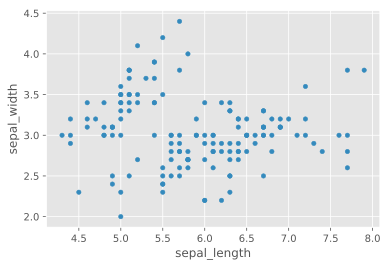

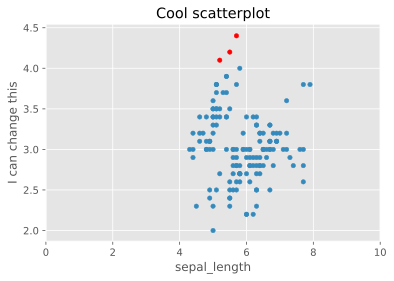

In [15]:
# usual plot
irisdf.plot(x="sepal_length", y="sepal_width", kind="scatter")

# calculating IQR (difference between 75% and 25% quantile)
IQR = irisdf["sepal_width"].quantile(0.75) - irisdf["sepal_width"].quantile(0.25) # interquartile range

# filtering out outliers (rows with "extreme" values - not all of them are actually outliers)
outliers = irisdf[irisdf["sepal_width"] > irisdf["sepal_width"].quantile(0.75) + 1.5*IQR]

# remove outliers from other data
usual = irisdf.drop(outliers.index)

# plot outliers with different color
ax = usual.plot(x="sepal_length", y="sepal_width", kind="scatter")
outliers.plot(x="sepal_length", y="sepal_width", kind="scatter", c="red", ax=ax)
ax.set_title("Cool scatterplot")
ax.set_ylabel("I can change this")
ax.set_xlim([0,10]);

### Example 2 - histogram

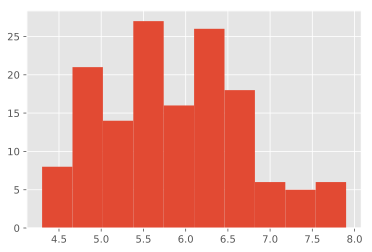

In [16]:
irisdf["sepal_length"].hist();

### Example 3 - barplot for categorical values

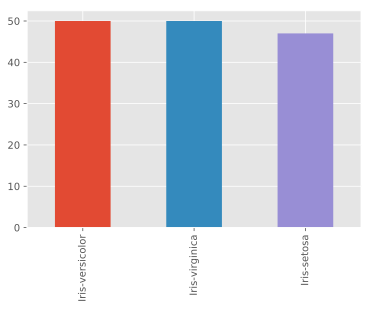

In [17]:
irisdf.species.value_counts().plot(kind="bar");

### Example 4 - grouped barplot

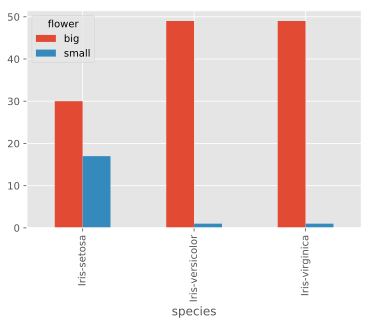

In [18]:
irisdf.groupby(["species", "flower"])["sepal_length"].count().unstack().plot(kind="bar");

## Machine learning with sklearn

In [19]:
# We have a dataset with numerical and categorical features
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_sum,petal_max,flower
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.4,big
1,4.9,3.0,1.4,0.2,Iris-setosa,1.6,1.4,small
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.3,small
3,4.6,3.1,1.5,0.2,Iris-setosa,1.7,1.5,small
4,5.0,3.6,1.4,0.2,Iris-setosa,1.6,1.4,big


In [20]:
from sklearn.preprocessing import LabelEncoder

# We can use LabelEncoder to convert the column flower into a numeric vector, but this might introduce unwanted order
enc = LabelEncoder()
flower_num = enc.fit_transform(irisdf["flower"])
flower_num[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [21]:
# Pandas has a method get_dummies that converts the categorical values of a feature into new binary features
irisdf_dummies = pd.get_dummies(irisdf, columns = ["flower"])
irisdf_dummies.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_sum,petal_max,flower_big,flower_small
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.4,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.6,1.4,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.3,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1.7,1.5,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1.6,1.4,1,0


In [22]:
# Next we can create our training and testing datasets with a train_test_split method
# at the moment train set size will be 75% of the data and test set size 25%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(irisdf_dummies.drop(["species"], axis=1),
                                                    irisdf_dummies.species, test_size=0.25, random_state=0)

In [23]:
# Results of the splitting are pandas Dataframes (for X_) and Series (for y_)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((110, 8), (37, 8), (110,), (37,))

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Next we can fit our model on the training set, we have chosen KNN model with 1 neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
# We can ask the model to directly calculate the accuracy
knn.score(X_train, y_train)
knn.score(X_test, y_test)

1.0

0.972972972972973

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can also let the model predict the values for the test set
y_pred = knn.predict(X_test)
print(y_pred[:10])

# and calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# report for other classification measures
print("Classification report:")
print(classification_report(y_test, y_pred))

# and the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa']
Accuracy: 0.972972972972973
Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

      micro avg       0.97      0.97      0.97        37
      macro avg       0.98      0.96      0.97        37
   weighted avg       0.97      0.97      0.97        37

Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  1  8]]
